#**<u>TRABAJO PRÁCTICO DE FUNDAMENTOS DE CIENCIAS DE DATOS<u>**

**TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL  -  COMISIÓN 1**
<br>

Alumnos

1. ACCURSO, Agustín

2. JUAREZ, Leandro Santiago


# **INFORME DE ACCIDENTES DE TRANSITO EN LA PROVINCIA DE SANTA FE**  





## <u>Introducción y objetivos planteados:</u>

**Introducción**: El objetivo del presente informe es realizar un análisis de los hechos viales **<u>con lesionados y/o víctimas fatales</u>** durante el período comprendido por los años 2019 a 2021. Este bloque temporal tiene la particularidad de haberse visto afectado durante los períodos 2020 y 2021 por las circustancias de la pandemia Covid-19 por lo cual para su interpretación correcta debe hacerse a la luz de ese evento que entre otras particularidades redujo durante extensos periodos de tiempo la circulación de vehículos y personas. No hacerlo cuando estos años estén involucrados en el análisis puede llevar a conclusiones equivocadas.
<br>
<br>


**Objetivo**: pese a las particularidades de los peridodos bajo análisis buscamos para el presente como objetivo  describir y explorar relaciones de los accidentes con las caraterísticas descriptas en el párrafo anterior, en cuanto a factores como la temporalidad (investigar si factores como las horas o los meses afectan la sinestrialidad) y la espacialidad (exploraremos preguntas tales como si hay zona de mayor accidentología, o si hay diferencias entre lo urbano y lo rural) con el objetivo de ofrecer al lector fundamentos para pensar políticas que mejoren la seguridad vial en el ámbito de la provincia de Santa Fe.
<br><br>




##<u>Sobre las fuentes de datos</u>

 Para el logro de los objetivo planteados en la sección anterior se han tomado como fuentes de infomacion principal:

 1. Datos oficiales suministrados por la provincia de Santa Fe en su portal "Datos abiertos Santa Fe" en la sección correspondinte al *Observatorio Vial* (https://datos.santafe.gob.ar/dataset/observatorio-vial)   
<br>

Diccionario de datos:


- **anio_acci**: Año en el cual se produce el siniestro  
- **nro_acci**: Número con el que se registra el siniestro  
- **Fecha**: Fecha en la que ocurre el siniestro  
- **desc_dia**: Día de la semana  
- **hora_aprox**: Hora aproximada en la que ocurre el siniestro  
- **desc_ruta**: Si el siniestro es sobre una ruta, indica la ruta  
- **km**: Kilómetro asociado a la ruta  
- **cant_participantes**: Cantidad de participantes en el siniestro  
- **desc_participante**: Tipo de vehículo involucrado  
- **calle_avenida_km**: Si el siniestro ocurrió en zona urbana, descripción de la arteria vial donde sucedió
- **total**: Cantidad de personas involucradas en el siniestro  
- **heridos_leves**: Cantidad de heridos leves involucrados en el siniestro  
- **heridos_graves**: Cantidad de heridos graves involucrados en el siniestro  
- **heridos_gravisimos**: Cantidad de heridos gravísimos involucrados en el siniestro  
- **ilesos**: Cantidad de personas involucradas ilesas en el siniestro  
- **fallecidos**: Cantidad de fallecidos en el siniestro  
- **sin_datos**: Cantidad de personas cuyas consecuencias se desconocen en el siniestro  
- **posicion_XY**: Coordenadas de Latitud y Longitud  
- **desc_tipo_via**: Descripción del tipo de calle  
- **desc_ruta_ori**: Nomenclatura de la ruta involucrada  
- **desc_loc**: Descripción de la localidad involucrada  
- **desc_dpto**: Descripción del departamento (división política) involucrado  
- **desc_tipo_calzada**: Material de construcción de la calzada  
- **desc_tipo_banquina**: Existencia o tipo de banquina  
- **desc_unidad_regional**: Jurisdicción de la unidad regional  
- **desc_lugar_calzada**: Lugar del incidente en relación a la calzada  
- **desc_zona**: Situación urbana o rural de la zona  
- **desc_prioridad**: Indicación de elemento que indique prioridad  
- **desc_estado_semaforo**: Indicación del estado funcional del semáforo al momento del siniestro  
- **desc_lugar_via**: Descripción de la vinculación con otras vías (ej. intersección)  
- **desc_estado_via**: Descripción del estado de la vía  
- **desc_estado_visibilidad**: Descripción de la visibilidad  
- **desc_luminosidad**: Caracterización de la luminosidad  
- **desc_estado_clima**: Estado del clima  
- **desc_tipo_colision**: Característica de la colisión  
- **desc_tipo_atropello**: Descripción del elemento o sujeto atropellado  
- **desc_tipo_hecho**: Caracterización del tipo de hecho (ej. Vuelco, Colisión)  
- **desc_pres_calzada**: Caracterización adicional sobre la calzada  
- **desc_senializacion**: Tipo de señalización existente  
- **desc_separacion_via**: Tipo de separación entre vías  
- **desc_restriccion**: Existencia de restricción a la circulación  




 <br>

 2. Datos poblacionales publicados por *Instituto Nacional de Estadística y Censos de la República -INDEC* - (https://www.indec.gob.ar) en particular los datos poblacionales de la población por departamento según el censo 2022 (por ser el mas próximo al periodo baja análisis) ("https://censo.gob.ar/wp-content/uploads/2023/11/c2022_santafe_est_c1_21.xlsx")




# Instalación  de librerias necesarias
 En el Siguiente bloque de código se importan las librerías necesarias y se fijan parámetros necesarios para la correcta visualización de datos.  


In [35]:
import geopandas as gpd
import pandas as pd
# !apt-get install -y ca-certificates  # Se tuvo que correr la primera vez que se ejecutó luego no fue necesario
# !update-ca-certificates  # Se tuvo que correr la primera vez que se ejecutó luego no fue necesario
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Point
import folium #libreria con mapas
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
pd.set_option('display.max_columns', None)
from datetime import time
from matplotlib.ticker import FormatStrFormatter



#  **<u>Extracción de información, incorporación de información adiconal y concatenación de datos</u>**


In [36]:
! gdown "https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/3227c19f-42c2-4647-8ad9-70063e020bca/download/siniestros-viales-2021.csv"
! gdown "https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/9675d0d8-8681-4e10-8d05-955cb003cebf/download/siniestros-viales-2020.csv"
! gdown "https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/77a93abb-5741-42e5-9d7c-df86b4f52f22/download/siniestros-viales-2019.csv"

Downloading...
From: https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/3227c19f-42c2-4647-8ad9-70063e020bca/download/siniestros-viales-2021.csv
To: /content/siniestros-viales-2021.csv
100% 3.59M/3.59M [00:04<00:00, 836kB/s]
Downloading...
From: https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/9675d0d8-8681-4e10-8d05-955cb003cebf/download/siniestros-viales-2020.csv
To: /content/siniestros-viales-2020.csv
100% 2.70M/2.70M [00:01<00:00, 2.01MB/s]
Downloading...
From: https://datos.santafe.gob.ar/dataset/04ad60b0-b750-4a14-8f22-3d078d618dd9/resource/77a93abb-5741-42e5-9d7c-df86b4f52f22/download/siniestros-viales-2019.csv
To: /content/siniestros-viales-2019.csv
100% 4.39M/4.39M [00:01<00:00, 2.73MB/s]


In [37]:


#  Creación de los data Frame por cada año
data_2021 = pd.read_csv('siniestros-viales-2021.csv', encoding="UTF-8")
data_2020 = pd.read_csv('siniestros-viales-2020.csv', encoding="UTF-8")
data_2019 = pd.read_csv('siniestros-viales-2019.csv', encoding="UTF-8")
# Fuimos probando con otras opciones  ISO-8859-1", ISO-8859-2, "Latin1", pero "UTF-8" es la que mejor se adapta

# Población de santa fe repartida por departamento Fuente año datos tomados de
# "https://censo.gob.ar/wp-content/uploads/2023/11/c2022_santafe_est_c1_21.xlsx"

datos_censo_2022 = {
    "belgrano": 48781,
    "caseros": 86912,
    "castellanos": 190577,
    "constitución": 93441,
    "garay": 24927,
    "general lópez": 201574,
    "general obligado": 197986,
    "iriondo": 74504,
    "la capital": 572265,
    "las colonias": 115740,
    "9 de julio": 30995,
    "rosario": 1348725,
    "san cristóbal": 72801,
    "san javier": 33274,
    "san jerónimo": 87307,
    "san justo": 46665,
    "san lorenzo": 194580,
    "san martín": 67827,
    "vera": 56027
}


# Diccionaro para dicotomizar la variable luminosidad

diccionario_luminosidad = {

'Diurna' : 'Diurna',
'Nocturna' : 'Nocturna',
'Nocturna,Con luz artificial' : 'Nocturna',
'Amanecer' : 'Diurna',
'Atardecer' : "Nocturna",
'Amanecer, Con luz artificial' : "Diurna",
'Con luz artificial': 'Nocturna',
'Diurna,Con luz artificial' : 'Diurna'}






In [38]:
#Concatenación de los diversos data Frame en un único Data Frame

data_total = pd.concat([data_2021, data_2020, data_2019])



# **<u>Exploración, Transformación, y  limpieza de datos</u>**

In [39]:
# Explorar tipos de datos

data_total.info()




<class 'pandas.core.frame.DataFrame'>
Index: 31825 entries, 0 to 12363
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anio_acci                31825 non-null  int64  
 1   nro_acci                 31825 non-null  int64  
 2   fecha                    31825 non-null  object 
 3   desc_dia                 31825 non-null  object 
 4   hora_aprox               27183 non-null  object 
 5   desc_ruta                5964 non-null   object 
 6   km                       31825 non-null  float64
 7   cant_participantes       31825 non-null  int64  
 8   desc_participante        31825 non-null  object 
 9   calle_avenida_km         31825 non-null  object 
 10  total                    31825 non-null  int64  
 11  heridos_leves            31825 non-null  int64  
 12  heridos_graves           31825 non-null  int64  
 13  heridos_gravisimos       31825 non-null  int64  
 14  ilesos                   31

## <u>Transformaciones</u>

In [40]:
# Transformaciones


# Convertir la columna 'fecha' a tipo datetime
data_total['fecha'] = data_total['fecha'].str.strip() # Tuvimos que eliminar espacios para poder hacer la conversión
data_total['fecha'] = pd.to_datetime(data_total['fecha'])

# convertir la columna 'hora_aprox' a tipo datime
data_total['hora_aprox'] = pd.to_datetime(data_total['hora_aprox'], format='%H:%M:%S', errors='coerce')
data_total['hora_aprox'] = data_total['hora_aprox'].dt.time  # Tuvimos que hacer esto porque sino viene con una fecha por defecto asociada



#Convertir nombre de los departamentos mal cargados que generan departamentos inexistentes o duplicaciones
print("------------Exploración de departamentos--------------------")
print(data_total['desc_dpto'].value_counts())

#data_agustin = data_total[data_total['desc_dpto'] == 'AGUSTÍN']  # ! Código de servicio se utilizó para econtrar donde estaba el error

# por la localización de longitud y latitud es de la ciudad de santa Fe se lo reemplaza por departamento "La Capital"

data_total['desc_dpto'] = data_total['desc_dpto'].str.replace('AGUSTÍN', 'La Capital')
data_total['desc_dpto'] = data_total['desc_dpto'].str.replace('Constituci�n', 'constitución')
data_total['desc_dpto'] = data_total['desc_dpto'].str.lower()

data_total['desc_dpto'].value_counts()




print("-----------luego de la unificación del nombres --------------------")
print(data_total['desc_dpto'].value_counts())



------------Exploración de departamentos--------------------
desc_dpto
Rosario             11682
La Capital           5267
Constitución         4342
San Lorenzo          2025
Las Colonias         1446
General Obligado     1310
Castellanos           716
General LÓPEZ         673
Vera                  495
San JERÓNIMO          442
General López         434
Belgrano              433
San CRISTÓBAL         417
San Jerónimo          357
Caseros               352
Iriondo               348
San Justo             289
San MARTÍN            285
9 de Julio            231
Garay                 157
San Javier            112
Constituci�n           11
AGUSTÍN                 1
Name: count, dtype: int64
-----------luego de la unificación del nombres --------------------
desc_dpto
rosario             11682
la capital           5268
constitución         4353
san lorenzo          2025
las colonias         1446
general obligado     1310
general lópez        1107
san jerónimo          799
castellanos        

## <u>Incorporación de columnas de servicio para la realización de informes.</u>

In [41]:
#Se agrega un columna donde se extrae el mes. para poder trabajar con esa variable ( 1 corresponde a enero, 2 a febrero, ....)


data_total['mes'] = data_total['fecha'].dt.month

data_total

,anio_acci,nro_acci,fecha,desc_dia,hora_aprox,desc_ruta,km,cant_participantes,desc_participante,calle_avenida_km,total,heridos_leves,heridos_graves,heridos_gravisimos,ilesos,fallecidos,sin_datos,posicion_XY,desc_tipo_via,desc_ruta_ori,desc_loc,desc_dpto,desc_tipo_calzada,desc_tipo_banquina,desc_unidad_regional,desc_lugar_calzada,desc_zona,desc_prioridad,desc_estado_semaforo,desc_lugar_via,desc_estado_via,desc_estado_visibilidad,desc_luminosidad,desc_estado_clima,desc_tipo_colision,desc_tipo_atropello,desc_tipo_hecho,desc_pres_calzada,desc_senializacion,desc_separacion_via,desc_restriccion,mes
0,2021,1,2021-01-15,Viernes,18:40:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Centeno Y Constitución,3,2,0,0,1,0,0,"-32.97847, -60.68338",Calle,NaN,ROSARIO,rosario,Asfalto,No existe,II,Dentro,Urbana,Ninguna,No existe,Intersección,Bueno,Buena,Diurna,Buen Tiempo,S/D,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,1
1,2021,2,2021-01-13,Miercoles,13:10:00,NaN,0.0,2,"Moto/Ciclomotor,Moto/Ciclomotor",Vera Mujica Y Dr. Rivas,2,1,0,0,0,0,1,"-32.97853, -60.67626",Calle,NaN,ROSARIO,rosario,Asfalto,No existe,II,Dentro,Urbana,Ninguna,No existe,Intersección,Bueno,Buena,Diurna,Buen Tiempo,De alcance,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,1
2,2021,3,2021-01-14,Jueves,00:50:00,NaN,0.0,2,"Moto/Ciclomotor,Pickup/Utilitario",Av. Battle y Ordoñez Y Santiago,2,1,0,0,1,0,0,"-33.00942, -60.66742",Calle,NaN,ROSARIO,rosario,Asfalto,Pavimento,II,Dentro,Urbana,Ninguna,No existe,Intersección,Con baches,Reducida,Nocturna,Buen Tiempo,Lateral,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,1
3,2021,4,2021-01-12,Martes,14:10:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Pje. Suriguez y Acha,2,1,0,0,1,0,0,"-33.00508, -60.65831",Calle,NaN,ROSARIO,rosario,Asfalto,Pavimento,II,Dentro,Urbana,Ninguna,No existe,Intersección,Bueno,Buena,Diurna,Buen Tiempo,Frontal,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,1
4,2021,5,2021-01-11,Lunes,18:00:00,NaN,0.0,2,"Peatón,Moto/Ciclomotor",Bv. Oroño,2,1,0,0,0,0,1,"-32.97201, -60.66032",Calle,NaN,ROSARIO,rosario,Asfalto,Pavimento,II,Dentro,Urbana,Semáforo,Funciona,Intersección,Bueno,Buena,Diurna,Buen Tiempo,S/D,Peatón,Colisión,Ninguna,Vertical,Cordón divisorio,Sin restricción,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12359,2019,12699,2019-08-10,Sabado,14:00:00,NaN,0.0,1,Moto/Ciclomotor,General Juan Las Heras 3000,1,1,0,0,0,0,0,"-33.045933252892,-61.178080555524",Calle,NaN,CASILDA,caseros,Asfalto,No existe,IV,Dentro,Urbana,Ninguna,No existe,Intersección,Bueno,Buena,Diurna,Buen Tiempo,Atropello animal,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,8
12360,2019,12700,2019-08-14,Miercoles,16:00:00,Ruta Provincial 14,57.0,3,"Camión c / Acoplado,Automóvil,Automóvil",,5,2,0,0,3,0,0,"-33.35313987038771, -61.13813427042",Ruta,14,BIGAND,caseros,Asfalto,Natural,IV,Dentro,Rural,Otra Señal,No existe,Recta,Con baches,Buena,Diurna,Buen Tiempo,Múltiple,S/D,Colisión,Ninguna,"Horizontal,Vertical",Línea divisoria pintada,"Obra en Construcci�n,Reparaci�n de V�a",8
12361,2019,12701,2019-08-08,Jueves,19:40:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Buenos Aires Y Mariano Moreno,2,1,0,0,1,0,0,"-33.047138388441,-61.171218434848",Calle,NaN,CASILDA,caseros,Asfalto,No existe,IV,Dentro,Urbana,Ninguna,Funciona,Intersección,Bueno,Buena,Diurna,Buen Tiempo,Lateral,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,8
12362,2019,12702,2019-08-21,Miercoles,10:45:00,NaN,0.0,2,"Pickup/Utilitario,Moto/Ciclomotor",Boulevard Ovidio Lagos Y San Juan,3,2,0,0,1,0,0,"-33.048940149253,-61.160761553514",Avenida,NaN,CASILDA,caseros,Asfalto,No existe,IV,Dentro,Urbana,Ninguna,No existe,Intersección,Bueno,Buena,Diurna,Buen Tiempo,Lateral,S/D,Colisión,Ninguna,S/D,Ninguna,Sin restricción,8


# **<u>Analisis de datos</u>**.

## <u>Muertes en accidentes</u>

En esta sección analizaremos la cantidad de fallecidos  en siniestros viales,  dado a que la pérdida de vidas es el evento con mayor gravedad asociado a la sinestrialidad vial. Para ello una primer aproximación es contar la frecuencia de estos eventos.

In [42]:

data_fallecidos = data_total[(data_total['fallecidos'] > 0) ]

data_fallecidos_por_anio = data_fallecidos[['anio_acci', 'fallecidos']].groupby('anio_acci').sum()



-------------------------------------------
           fallecidos
anio_acci            
2019              522
2020              371
2021              456
-------------------------------------------


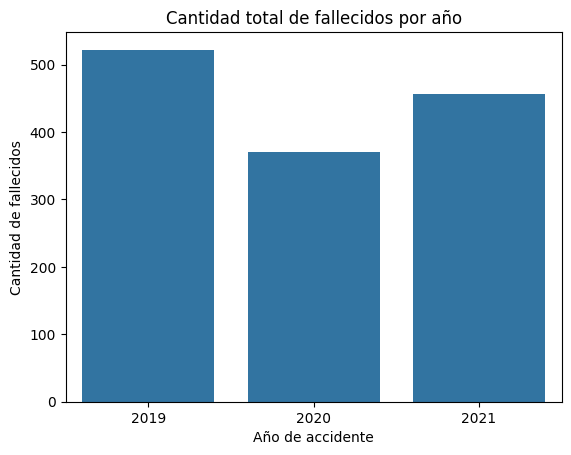

In [43]:
print("-------------------------------------------")

print(data_fallecidos_por_anio )

print("-------------------------------------------")

sns.barplot(data=data_fallecidos_por_anio, x='anio_acci', y='fallecidos')
plt.title('Cantidad total de fallecidos por año')
plt.xlabel('Año de accidente')
plt.ylabel('Cantidad de fallecidos')
plt.show()

**Observaciones**: la disminución de la mortalidad total en los envento en el año 2020 es probablemtne un efecto de la cuarentena por el evento Covid -19


**¿Hay estacionalidad en los accidentes que causan fallecimentos?**  
<br>
A los fines de explorar respuestas a esta pregunta analizaremos las series temporales de los años bajo investigación, para así observar su comportamiento

-------------------Cantidad de falecidos por año y mes ------------------------
mes        1   2   3   4   5   6   7   8   9   10  11  12
anio_acci                                                
2019       28  41  42  53  42  31  43  49  46  58  42  47
2020       39  43  32  18  20  28  36  25  24  25  31  50
2021       38  41  35  38  24  25  45  44  33  43  36  54
------------------------------------------------------------------------------


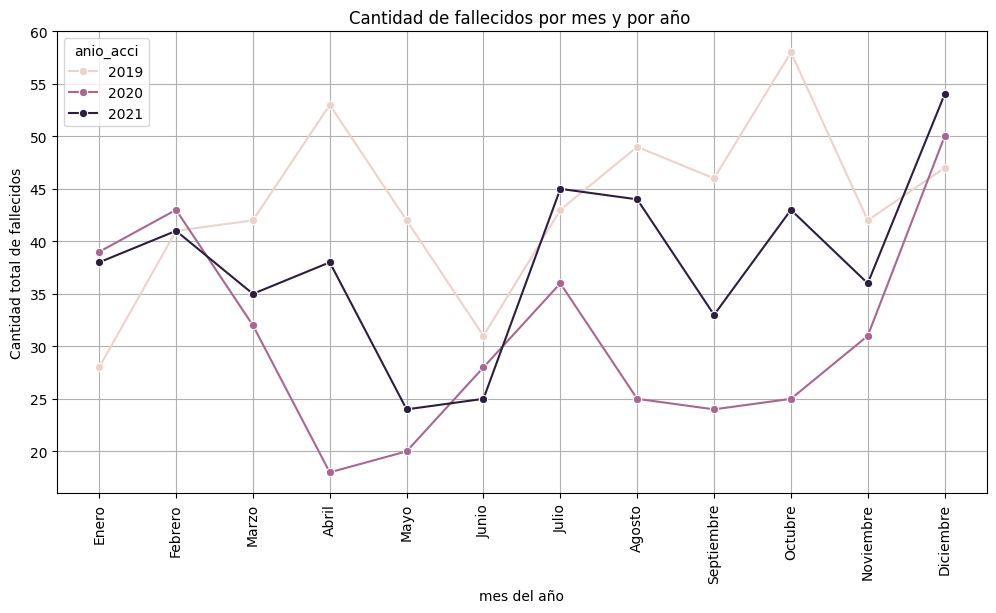

In [44]:
data_fallecidos_por_ano_y_mes = data_total[['anio_acci','mes','fallecidos']].groupby(['anio_acci','mes']).sum()

#pasamos del formato largo al ancho para generar un  un cuadro de dobre entrada.
data_fallecidos_ancho = data_fallecidos_por_ano_y_mes.reset_index().pivot(index='anio_acci', columns='mes',values='fallecidos')


print("-------------------Cantidad de falecidos por año y mes ------------------------")
print(data_fallecidos_ancho)
print("------------------------------------------------------------------------------")
plt.figure(figsize=(12,6))


fallecidos_por_mes_y_anio_graph = sns.lineplot(data=data_fallecidos_por_ano_y_mes , x='mes', y='fallecidos', hue='anio_acci', marker='o')

plt.xticks(ticks=range(1, 13), labels=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation = 90)



plt.title('Cantidad de fallecidos por mes y por año ')
plt.xlabel('mes del año')
plt.ylabel('Cantidad total de fallecidos')
plt.grid(True)
plt.show()

**Observaciones** :  A partir del análisis temporal por mes podemos observar que diciembre, por ejemplo, es un mes en donde la sinestrialidad se incrementea. También durante el año 2020 puede observarse los efectos de las etapas de D.I.S.P.O. (distanciamiento social, preventivo y obligatorio) y A.S.P.O (Aislameinto social, preventivo y obligatorio”).

**¿Cuál es la tasa de mortalidad en siniestros por cada 1000 habitantes?**  

Con el fin de  dar respueta a esta pregunta hemos tomado la división política de la provincia. Siendo esta una provincia  con marcados contrastes poblacionales nos proponemos realizar una vinculación entre su ploblación según el censo 2022  y los fallecidos en estos hechos para el año 2021  .



--------Tabla de tasa de fallecidos por departamentos cada 1000  habitantes  en orden descendente----
       desc_dpto  fallecidos  poblacion_total  fallecidos por cada 1000 habitantes
    constitución          65            93441                             0.695626
           garay           8            24927                             0.320937
      9 de julio           8            30995                             0.258106
            vera          14            56027                             0.249880
        belgrano          12            48781                             0.245997
         iriondo          17            74504                             0.228176
   san cristóbal          13            72801                             0.178569
    las colonias          20           115740                             0.172801
     castellanos          30           190577                             0.157417
     san lorenzo          30           194580                       

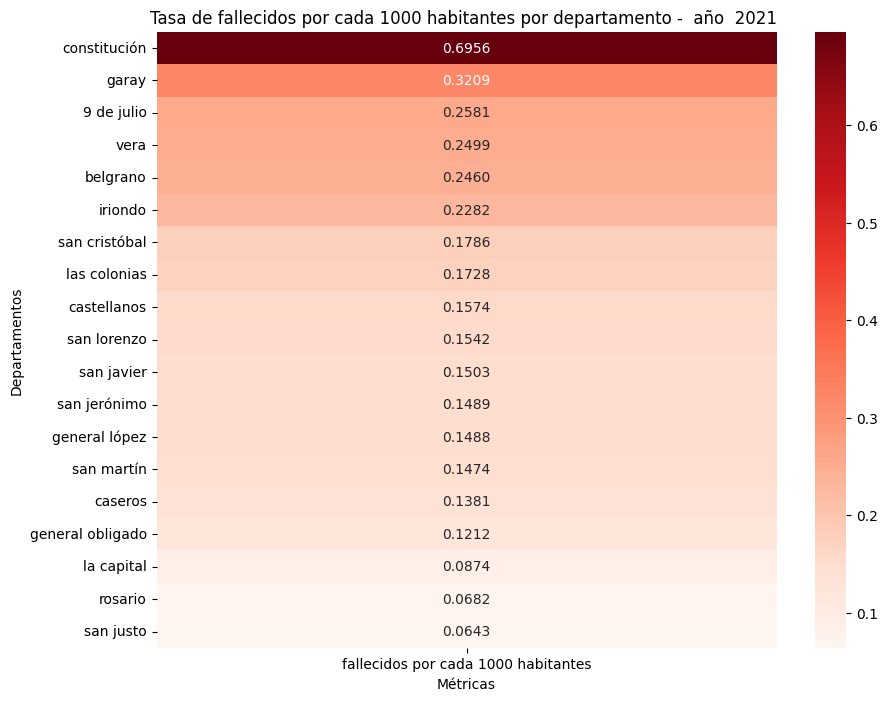

In [45]:
fallecidos_por_dpto_2021 = data_total[data_total['anio_acci'] == 2021].groupby('desc_dpto')['fallecidos'].sum().reset_index()


fallecidos_por_dpto_2021['poblacion_total'] = np.nan
fallecidos_por_dpto_2021['poblacion_total'] = fallecidos_por_dpto_2021['desc_dpto'].map(datos_censo_2022)
fallecidos_por_dpto_2021['fallecidos por cada 1000 habitantes'] = fallecidos_por_dpto_2021['fallecidos'] / fallecidos_por_dpto_2021['poblacion_total']*1000

fallecidos_por_dpto_2021.sort_values(by='fallecidos por cada 1000 habitantes', ascending=False, inplace=True)

print("--------Tabla de tasa de fallecidos por departamentos cada 1000  habitantes  en orden descendente----")
print(fallecidos_por_dpto_2021.to_string(index = False))
print("------------------------------------------------------------------------------")


plt.figure(figsize=(10, 8))
sns.heatmap(fallecidos_por_dpto_2021[["fallecidos por cada 1000 habitantes"]].set_index(fallecidos_por_dpto_2021["desc_dpto"]),
             annot=True, cmap="Reds", fmt=".4f")
# Configurar etiquetas y título
plt.title("Tasa de fallecidos por cada 1000 habitantes por departamento -  año  2021 ")
plt.xlabel("Métricas")
plt.ylabel("Departamentos")
plt.show()

**Observaciones**: Notamos que los departamentos que incluyen los grandes centros urbanos como son el departamento Rosario y la Capital se ubican en las con una tasa mucho menor que aquellos departamentos en  donde la población es mucho menor.  


**¿El factor luminosidad y el factor urbano  marcan alguna diferencia?**

Para orientarnos en este tema proponemos realizar con todos los accidentes que hayan causado lesionados y/o fallecidos una matriz con las variables luminosidad y su relación entre lo urbano y lo rural. El dato de la luminosidad,que es un factor que cambia durante el día, fue estandarizado en dos estados "Diurna" o "Noctura". Siendo este un dato proveniente del dataset, aquellos casos en donde la indicación no era contundente se clasificaron en alguna de estas dos opciones, puede consultarse para ello nuestra sección de transformación de datos.


<ipython-input-46-3ee6995a8e41>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luminosidad_urbanidad_filtrado['porcentaje'] = luminosidad_urbanidad_filtrado['cantidad'] / total * 100


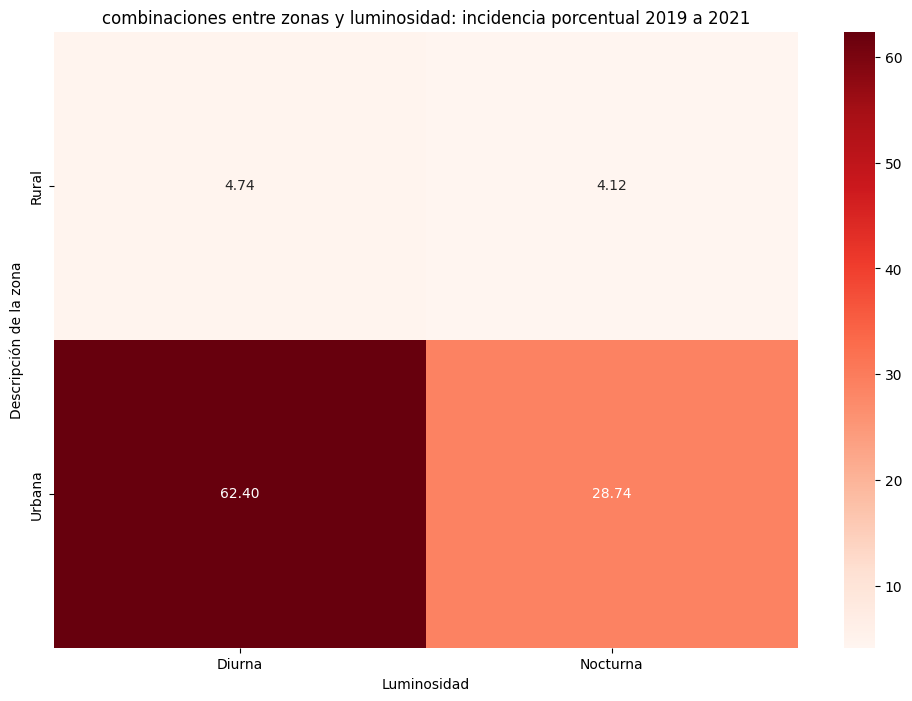

In [46]:
# ¿es la luminosidad un factor importante? ¿ Es la urbanidad un factor importante  ?  # la idea es generar un cuadro de doble entrada

# Estandarizamos la luminosidad

data_total['luminosidad_standar'] = data_total['desc_luminosidad'].map(diccionario_luminosidad)

# es lo urbano un factor importante?

luminosidad_urbanidad = data_total.groupby(['desc_zona', 'luminosidad_standar']).size().reset_index()

# Renombrar una columna
luminosidad_urbanidad.rename(columns={0: 'cantidad'}, inplace=True)

# Vamos a trabajar solo con los datos donde se tenga la zona

luminosidad_urbanidad_filtrado = luminosidad_urbanidad[luminosidad_urbanidad['desc_zona'] != "S/D"]




total = luminosidad_urbanidad_filtrado['cantidad'].sum()
# Calcular el porcentaje
luminosidad_urbanidad_filtrado['porcentaje'] = luminosidad_urbanidad_filtrado['cantidad'] / total * 100


# Pasamos a formato ancho.
heatmap_data = luminosidad_urbanidad_filtrado.pivot_table(values='porcentaje', index='desc_zona', columns='luminosidad_standar')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".2f")
plt.title('combinaciones entre zonas y luminosidad: incidencia porcentual 2019 a 2021')
plt.ylabel('Descripción de la zona')
plt.xlabel('Luminosidad')
plt.show()








**Observaciones** : Por un lado se demuestra que el ámbito urbano tiene un contundente peso relativo mayor que el ámbito rural, sin embargo en este último, el factor luminosidad no parece generar una diferencia significativa como sí lo hace en el ámbito urbano.
<br>
<br>

**¿Hay horas de mayor siniestrialidad vial?**

Evaluando el trieño 2019  a 2021 como un total para aquellos registros que contienen la hora aproximada del evento, analizamos la frecuencia relativa de los horarios en donde se producen los picos de acciedentes. Para ello se han agrupado los sinientros dentro de la misma hora; por ejemplo, todos los eventos que  de las entre las 9:00 y las 9:59, deben relacinarse con la referencia 9:00



<ipython-input-47-7d109ce99b9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_hora['hora_aprox'] = data_total_hora['hora_aprox'].astype(str)
<ipython-input-47-7d109ce99b9d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total_hora['hora_aprox'] = data_total_hora['hora_aprox'].str.split(':').str[0]
<ipython-input-47-7d109ce99b9d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

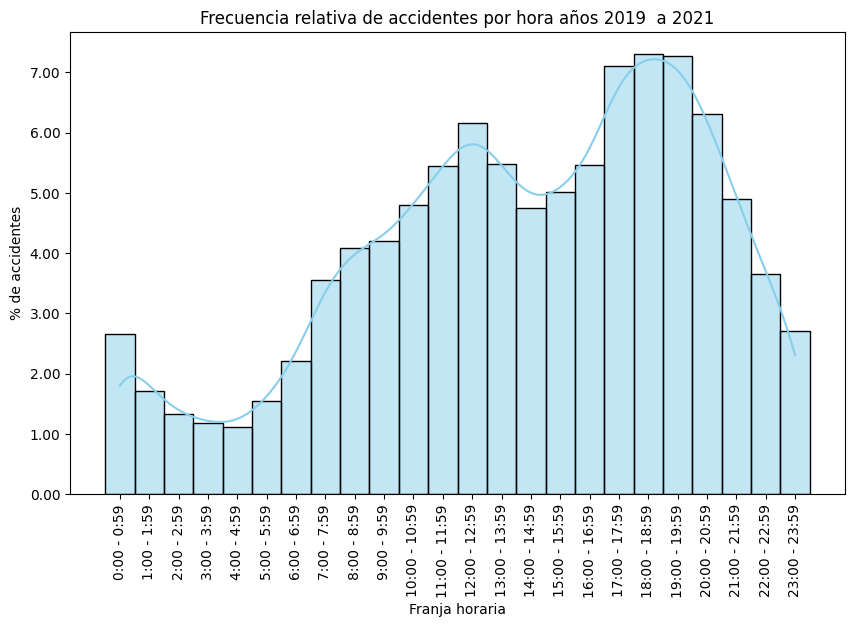

In [47]:
# original .. en cantidades absolutas


# Se seleccionan los que tienen datos en hora, y se deja solo la hora (sin minutos ni segundos)
data_total_hora = data_total[data_total.hora_aprox.isna() == False]

data_total_hora['hora_aprox'] = data_total_hora['hora_aprox'].astype(str)
data_total_hora['hora_aprox'] = data_total_hora['hora_aprox'].str.split(':').str[0]

# Se pasa 'hora_aprox' a int para asegurarme que se separen correctamente las bins
data_total_hora['hora_aprox'] = data_total_hora.hora_aprox.astype(int)


# Se crea el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_total_hora['hora_aprox'], bins=24, discrete=True, color='skyblue', stat='percent', kde = True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Se establecen marcas del eje x para mostrar las horas en el formato 'H:00'
plt.xticks(ticks=range(24), labels=[f'{i}:00 - {i}:59' for i in range(24)], rotation=90)
# Mostrar el gráfico
plt.xlabel('Franja horaria')
plt.ylabel('% de accidentes')
plt.title('Frecuencia relativa de accidentes por hora años 2019  a 2021')
plt.show()





**Observaciones** :  De los datos representados podemos observar que se producen  dos picos en la frecuencia de accidentes con lesionados

1. De 11:00 a 13:59 hs
<br>
2. de 17:00 a 19:59 hs.


## <u>Análisis geográfico</u>



**¿Cuáles son las zonas de mayor conflictividad?**

En primera instancia se realiza un mapa de calor para visualizar la distribución del volumen de accidentes en toda la provincia. Para eso, se obtendrá de una fuente externa las coordenadas correspondientes a los límites provinciales, luego se transformará la información geográfica-espacial que contiene el dataset para finalmente poder reflejarla en el mapa.

In [48]:
# Se obtienen las coordenadas de la provincia:

#url geojson original:
#"https://github.com/alvarezgarcia/provincias-argentinas-geojson/blob/98a0574c68da75ef55153cf9c2cf64ec3833ce15/SANTAFE.json"
#se pasa a formato raw (para acceder directamente al contenido de la URL sin la interfaz web y descargar el archivo):
url_geojson = 'https://raw.githubusercontent.com/alvarezgarcia/provincias-argentinas-geojson/98a0574c68da75ef55153cf9c2cf64ec3833ce15/SANTAFE.json'

# Se lee el archivo
santa_fe = gpd.read_file(url_geojson)
santa_fe = santa_fe.to_crs(epsg=4326) #aseguramos que el sistema de coordenadas del GeoJSON esté en WGS84 (estándar global)

#Separar latitud y longitud de nuestro dataframe:
data_geo = data_total[data_total['posicion_XY'].notna() & data_total['posicion_XY'].str.contains(',')] #elimino registros vacíos o sin comas
data_geo[['lat', 'lon']] = data_geo['posicion_XY'].str.split(',', expand=True)
data_geo['lat'] = data_geo['lat'].astype(float)
data_geo['lon'] = data_geo['lon'].astype(float)

<ipython-input-48-9caeb60014b3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_geo[['lat', 'lon']] = data_geo['posicion_XY'].str.split(',', expand=True)
<ipython-input-48-9caeb60014b3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_geo[['lat', 'lon']] = data_geo['posicion_XY'].str.split(',', expand=True)
<ipython-input-48-9caeb60014b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [49]:
# Crear geometría (GeoPandas espera Point(longitud, latitud))
geometry = [Point(xy) for xy in zip(data_geo['lon'], data_geo['lat'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(data_geo, geometry=geometry, crs='EPSG:4326') #asignamos el sistema de coordenadas WGS84 (estándar global)

In [50]:
# Crear mapa base
m_heat = folium.Map(tiles='CartoDB positron', zoom_start=7)
#m_heat.fit_bounds(santa_fe.total_bounds[[1, 0], :])
m_heat.fit_bounds([[santa_fe.total_bounds[1], santa_fe.total_bounds[0]],    #Se establece longitud y latitud mínima y máxima,
                    [santa_fe.total_bounds[3], santa_fe.total_bounds[2]]])  #para que el mapa aparezca ubicado en Santa Fe

# Crear heatmap con todos los puntos
heat_data = gdf[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=13, min_zoom=5, max_bounds=True).add_to(m_heat)

# Agregar el contorno de la provincia
folium.GeoJson(santa_fe, style_function=lambda x: {
    'color': 'red', 'fillOpacity': 0, 'weight': 1.5
}).add_to(m_heat)

# Si se quisiera guardar el mapa:
#m_heat.save("heatmap_santa_fe.html")

In [51]:
m_heat

**Observaciones**:

  1.   Algunos accidentes están localizados por fuera de la provincia en cuanto a sus coordenadas, en zonas muy próximas a los límites provinciales. Si bien hay dudas respecto a por qué han sido incluidos (tal vez por un error en la toma de coordenadas) los mismos por su escasa cuantía no desvirtuan el análisis.

  2. El punto de mayor calor de accidentes se da en la ciudad de Rosario .

  3. Si se proyectaran los corredores viales principales (Autopista Rosario - Buenos aires, Autopista Rosario Córdoba, Autopista Rosario - Santa Fe )  pueden observarse las zonas de mayor conflictividad.  Lo mismo puede hacerse con el resto  de rutas y caminos. Siendo estas tal vez zonas potenciales para mejorar la estrategia de reducción de daños: mejorar condiciones viales, reglamentaciones tales como velocidades máximas, incrementar la presencia de agentes de control, o algunas otras medidas a fozalizar en dichas zonas.  

  4. Se percibe un alto volumen en la avenida circunvalación de la ciudad de Rosairo, dónde principalmente los siniestros se dan en los accesos y salidas de la misma.



**¿Cuáles son las rutas con mayor cantidad de accidentes entre el 2019  y el 2021 ?**

In [52]:
# Contar accidentes por ruta
cant_acc_ruta = data_total['desc_ruta'].value_counts().reset_index()
cant_acc_ruta.columns = ['Corredor_vial', 'cantidad']  # Renombrar columnas

# Ordenar de mayor a menor
rutas_accidentes = cant_acc_ruta.sort_values(by='cantidad', ascending=False)

# Mostrar las 5 rutas con más accidentes
print("--------------------------TOP 5 de accidentes en ruta acumulado años 2019 a 2021------------- ")
print(rutas_accidentes.head(5))
print("-------------------------------------------------------------------------------------------- ")
# Mostrar la ruta con más accidentes


print(f'La ruta con más accidentes es la {rutas_accidentes["Corredor_vial"].iloc[0]} con {rutas_accidentes["cantidad"].iloc[0]} accidentes.')




--------------------------TOP 5 de accidentes en ruta acumulado años 2019 a 2021------------- 
             Corredor_vial  cantidad
0         Ruta Nacional 11      1253
1  Autopista Nacional A008       367
2          Ruta Nacional 9       349
3        Ruta Provincial 1       319
4         Ruta Nacional 33       255
-------------------------------------------------------------------------------------------- 
La ruta con más accidentes es la Ruta Nacional 11 con 1253 accidentes.



**¿En que zonas se produce el mayor número de fallecidos?**

A continuación, se tendrán en cuenta solo los accidentes que traigan como consecuencia fallecidos, y se los graficará como puntos en el mapa de la provincia, agrupándolos por cercanía, el usuario del presente informe puede realizar "zoom" sobre la imagen a los fines de tener un mayor o menor grado de detalle sobres las zonas involucaradas. Además, cuando el zoom alcana a un accidente puntual (simbolizados con puntos rojos), al hacer click sobre este, se puede obtener información acerca del siniestro.

In [53]:
# Filtrar fallecidos
gdf_fallecidos = gdf[gdf['fallecidos'] > 0]

# Crear mapa
m_fall = folium.Map(tiles='CartoDB positron', zoom_start=7)
m_heat.fit_bounds([[santa_fe.total_bounds[1], santa_fe.total_bounds[0]],      #
                    [santa_fe.total_bounds[3], santa_fe.total_bounds[2]]])

# Capa de clústeres
cluster = MarkerCluster().add_to(m_fall)

# Añadir puntos
for idx, row in gdf_fallecidos.iterrows():
    popup = (f"<b>Fecha:</b> {row['fecha']}<br>"
             f"<b>Hora:</b> {row['hora_aprox']}<br>"
             f"<b>Fallecidos:</b> {row['fallecidos']}<br>"
             f"<b>Localidad:</b> {row['desc_loc']}")

    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=5,
        popup=popup,
        color='darkred',
        fill=True,
        fill_opacity=0.8
    ).add_to(cluster)

# Agregar el contorno
folium.GeoJson(santa_fe, style_function=lambda x: {
    'color': 'red', 'fillOpacity': 0, 'weight': 1.5
}).add_to(m_fall)

# Para guardar:
#m_fall.save("fallecidos_santa_fe.html")

In [54]:
m_fall

**Observaciones**: Se ve de forma gráfica el despegue que hacen los dos centros urbanos principales (Rosario y Santa Fe) a la cabeza en terminos absolutos en la cantidad de fallecidos en los analizados eventos de transitos durante el periodo 2019 - 2021

#CONCLUSIONES:




A la luz de las observaciones realizadas durante el presente trabajo podemos concluir que:


1- Hay una estacionalidad en cuanto a los sientros viales que causan lesionados y/o fallecidos. Esta estacionalidad puede dividirse en aspectos:

 - Calendarios : el mes de diciembre es un mes al que debe prestarse atención en cuanto a los accidentes que allí se producen.

 - Horarios:  Hay dos marcados picos horarios en donde se producen los siniestros que van en las franjas de 11 a 14 hs  y de 17 a 19

 -Luminosidad: En los ámbitos urbanos la luminosidad puede ser un factor determinante en cuanto a la frecuencia relativa de los accidentes (pero no puede afirmarse que sea una causa real, tal vez entre otras cosas podría simplemente deberse a un mayor volumen de tráfico en horas diurnas), algo que no ocurre en los ámbitos rurales donde el factor luminosidad no altera considerablemente la estadística.

2- Desde el punto de vista poblacional y su impacto sociológico, teniendo en cuentan el ranking de la tasa de fallecidos por siniestros viales cada 1000 habitantes durante el 2021, resultaría de interés para estudios posteriores determinar si hay diferencias entre el impacto emocional que tienen esos sucesos en las zonas con baja población respecto a las zonas más densamente pobladas.


Los autores del presente informe, recomendamos profundizar el análisis de datos de la sinestrialidad, a los fines de mejorar la implementación de acciones en educación, infraestructura y concientización que favorezcan la reducción de daños asociedos a los siniestros viales.




A modo de cierre y reflexión, recomendamos ver este simple pero impactante anuncio que nos demuestra como la vida puede cambiar en un instante. A veces tenemos ciertas acciones incorporadas como rutinarias y no somos conscientes de la importancia de asignarle la atención y el 'respeto' que requieren. https://www.youtube.com/watch?v=mkHukKSgQzk